In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training images: {}'.format(X_train.shape))
print('Training images: {}'.format(X_test.shape))

Training images: (50000, 32, 32, 3)
Training images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


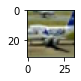

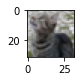

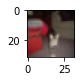

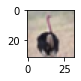

In [ ]:
for i in range(332, 336):
  plt.subplot(120+ 1+ i)
  #plt.figure(figsize=(3,3))
  img=X_train[i]
  plt.imshow(img)
  plt.show()

PREPROCESSING DATA

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255 
n_classes = 10

print("shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
print("shape after one-hot encoding: ", Y_train.shape)

shape before one-hot encoding:  (50000, 1)
shape after one-hot encoding:  (50000, 10)


BUILDING MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10, activation='softmax'))

# compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model
model.fit(X_train, Y_train, batch_size=128, epochs=20)  

Epoch 1/20
391/391 [==============================] - 530s 1s/step - loss: 1.8418 - accuracy: 0.3122
Epoch 2/20
391/391 [==============================] - 518s 1s/step - loss: 1.1525 - accuracy: 0.5919
Epoch 3/20
391/391 [==============================] - 518s 1s/step - loss: 0.9267 - accuracy: 0.6749
Epoch 4/20
391/391 [==============================] - 522s 1s/step - loss: 0.8011 - accuracy: 0.7200
Epoch 5/20
391/391 [==============================] - 518s 1s/step - loss: 0.7061 - accuracy: 0.7537
Epoch 6/20
391/391 [==============================] - 520s 1s/step - loss: 0.6371 - accuracy: 0.7772
Epoch 7/20
391/391 [==============================] - 515s 1s/step - loss: 0.5799 - accuracy: 0.7953
Epoch 8/20
391/391 [==============================] - 517s 1s/step - loss: 0.5286 - accuracy: 0.8145
Epoch 9/20
391/391 [==============================] - 518s 1s/step - loss: 0.4855 - accuracy: 0.8291
Epoch 10/20
391/391 [==============================] - 517s 1s/step - loss: 0.4512 - accura

In [8]:
model.evaluate(X_test , Y_test)

313/313 [==============================] - 27s 84ms/step - loss: 0.6989 - accuracy: 0.7843


[0.6988723278045654, 0.7843000292778015]

PREDICTING


In [9]:
classes =  range(0,10)

names=['airplane',
       'automobile',
       'bird',
       'cat',
       'deer',
       'dog',
       'frog',
       'horse',
       'ship',
       'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels= dict(zip(classes, names))

#generate batch of 9 images to predict
batch= X_test[100:109]
labels= np.argmax(Y_test[100:109], axis=-1)

# make predictions
predictions = model.predict(batch, verbose=1)


1/1 [==============================] - 1s 578ms/step


In [ ]:
print (predictions)

[[4.57506685e-05 1.27608200e-05 6.30574077e-02 1.52334780e-03
  4.32935238e-01 8.80181193e-02 7.61878400e-05 4.14250553e-01
  5.31434198e-05 2.74953454e-05]
 [1.32407906e-04 2.33249244e-04 8.94191489e-02 1.50773764e-01
  2.56976187e-01 2.99738437e-01 1.33744255e-01 6.44055754e-02
  3.88372270e-03 6.93289621e-04]
 [4.07355394e-08 1.15422529e-06 6.59339275e-06 8.33266065e-04
  1.96682635e-07 1.72575074e-05 9.99140024e-01 6.39426574e-08
  7.98463134e-07 6.38145139e-07]
 [2.29674174e-06 1.06577534e-06 3.97279917e-04 3.83540004e-01
  4.28317639e-04 1.42502727e-03 6.14177465e-01 9.52130995e-06
  1.12644520e-05 7.75492754e-06]
 [1.93867811e-09 9.99933958e-01 2.43427083e-15 2.62720672e-13
  7.99295858e-18 1.45750547e-16 1.50907303e-12 1.47358459e-15
  3.32920513e-06 6.26848196e-05]
 [6.84639345e-10 9.99872327e-01 4.06452823e-12 9.10294735e-13
  1.27336308e-18 9.61883754e-15 1.01391300e-11 1.17146457e-15
  9.98537075e-07 1.26625891e-04]
 [6.98651373e-02 1.37132090e-02 1.71516370e-02 6.25667393e

In [10]:
for image in predictions:
    print(np.sum(image))

0.99999994
1.0
0.99999994
1.0
0.99999994
0.99999994
0.9999999
1.0
1.0


In [11]:
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[4 5 6 3 1 1 6 6 8]


FINAL OBJECT DETECTION 

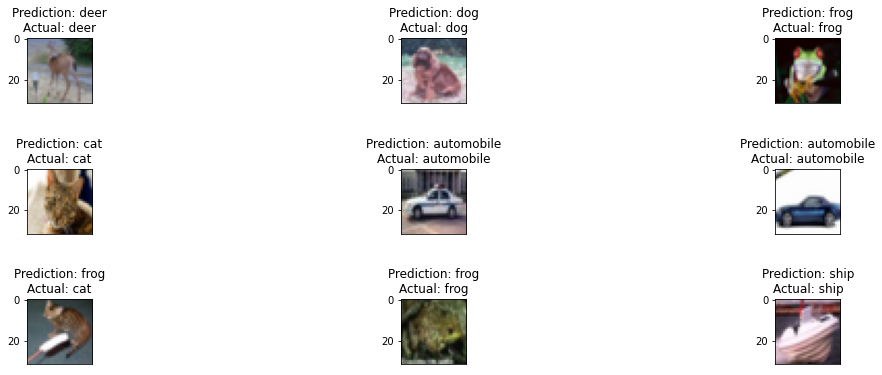

In [12]:
fig, axs=plt.subplots(3,3, figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(True)

    #plot the image
  axs[i].imshow(img)

  #show the plot
plt.show()